In [1]:
from pyHalo.preset_models import CDM, WDM
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [ ]:
zlens = 0.5
zsource = 2.0
path_to_interp = os.getcwd()+'/../pyHalo/Halos/adiabatic_tides_data/subhalo_mass_loss_interp'
f = open(path_to_interp, 'rb')
mass_loss_interp = pickle.load(f)
f.close()

subhalos_1 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=0.1,
                truncation_model_subhalos='ADIABATIC_TIDES', 
                 kwargs_trunction_model_subhalos={'log_m_host': 13, 'z_host': zlens, 
                                                  'mass_loss_interp': mass_loss_interp})

subhalos_1_wdm = WDM(zlens, zsource, log_mc=7., LOS_normalization=0.0, sigma_sub=0.1,
                truncation_model_subhalos='ADIABATIC_TIDES', 
                 kwargs_trunction_model_subhalos={'log_m_host': 13, 'z_host': zlens,
                                                 'mass_loss_interp': mass_loss_interp})

kwargs_concentration_model = {'c0': 50.0, 'beta': 0.9, 'zeta': 1.1, 'scatter': False}
subhalos_1_v2 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=0.1,
                truncation_model_subhalos='ADIABATIC_TIDES', 
                 kwargs_trunction_model_subhalos={'log_m_host': 13, 'z_host': zlens, 
                                                  'mass_loss_interp': mass_loss_interp},
                   concentration_model_subhalos='PEAK_HEIGHT_POWERLAW',
                   kwargs_concentration_model_subhalos=kwargs_concentration_model)

subhalos_2 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=0.1)

In [ ]:
tau_1 = []
tau_2 = []
tau_1_wdm = []
tau_1_v2 = []

for halo in subhalos_1.halos:
    params_phys = halo.params_physical
    tau_1.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_2.halos:
    params_phys = halo.params_physical
    tau_2.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_1_wdm.halos:
    params_phys = halo.params_physical
    tau_1_wdm.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_1_v2.halos:
    params_phys = halo.params_physical
    tau_1_v2.append(params_phys['r_trunc_kpc']/params_phys['rs'])
    
    fig = plt.figure(1)
fig.set_size_inches(8,5)
_ = plt.hist(np.log10(tau_1),bins=35,range=(-0.75, 1.5), color='k',alpha=0.5,density=True,
             label='CDM\nAdiabatic Tides+Galacticus')
_ = plt.hist(np.log10(tau_2),bins=35,range=(-0.75, 1.5), color='m',alpha=0.5,density=True,
            label='CDM and WDM\nGilman et al. (2020)')
_ = plt.hist(np.log10(tau_1_wdm),bins=35,range=(-0.75,1.5), color='r',alpha=0.5,density=True,
            label='WDM\nAdiabatic Tides+Galacticus')
_ = plt.hist(np.log10(tau_1_v2),bins=35,range=(-0.75,1.5), color='g',alpha=0.5,density=True,
            label='CDM\nAdiabatic Tides+Galacticus\n'+r'$c_8 = 50$')

plt.xlabel(r'$\log_{10} \frac{r_t}{r_s}$', fontsize=22)
plt.legend(frameon=False,fontsize=14)
plt.yticks([])

In [ ]:
zlens = 0.5
zsource = 2.0
LOS_1 = CDM(zlens, zsource, LOS_normalization=1.0, sigma_sub=0.0)
LOS_2 = CDM(zlens, zsource, LOS_normalization=1.0, sigma_sub=0.0,
           truncation_model_fieldhalos='SPLASHBACK')

In [ ]:
tau_LOS_1 = []
tau_LOS_2 = []

for halo in LOS_1.halos:
    params_phys = halo.params_physical
    tau_LOS_1.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in LOS_2.halos:
    params_phys = halo.params_physical
    tau_LOS_2.append(params_phys['r_trunc_kpc']/params_phys['rs'])


In [ ]:
fig = plt.figure(1)
fig.set_size_inches(8,5)
_ = plt.hist(np.log10(tau_LOS_1),bins=35,range=(0.5, 2.0), color='k',alpha=0.5,density=True,
             label='r50')
_ = plt.hist(np.log10(tau_LOS_2),bins=35,range=(0.5, 2.0), color='m',alpha=0.5,density=True,
            label='splahsback')

plt.xlabel(r'$\log_{10} \frac{r_t}{r_s}$', fontsize=22)
plt.legend(frameon=False,fontsize=14)
plt.yticks([])

In [16]:
median_rt_over_rs = 2.0
c_power = 3.0
zlens = 0.5
zsource = 2.0
sigma_sub = 0.1
subhalos_1 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=sigma_sub,
                truncation_model_subhalos='TRUNCATION_MEAN_DENSITY', 
                 kwargs_trunction_model_subhalos={'median_rt_over_rs': median_rt_over_rs, 'c_power': c_power})

subhalos_1_wdm = WDM(zlens, zsource, log_mc=5.5, LOS_normalization=0.0, sigma_sub=sigma_sub,
                truncation_model_subhalos='TRUNCATION_MEAN_DENSITY', 
                 kwargs_trunction_model_subhalos={'median_rt_over_rs': median_rt_over_rs, 'c_power': c_power})

kwargs_concentration_model = {'c0': 50.0, 'beta': 0.9, 'zeta': 1.1, 'scatter': False}
subhalos_1_v2 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=sigma_sub,
                truncation_model_subhalos='TRUNCATION_MEAN_DENSITY', 
                 kwargs_trunction_model_subhalos={'median_rt_over_rs': median_rt_over_rs, 'c_power': c_power},
                   concentration_model_subhalos='PEAK_HEIGHT_POWERLAW',
                   kwargs_concentration_model_subhalos=kwargs_concentration_model)

subhalos_2 = CDM(zlens, zsource, LOS_normalization=0.0, sigma_sub=sigma_sub)

([], [])

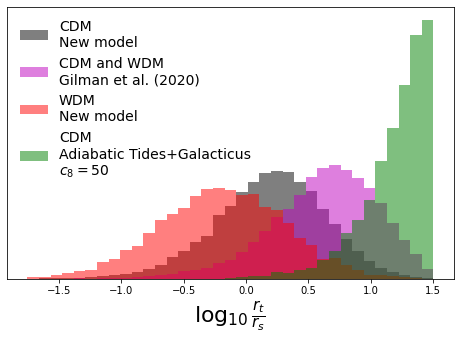

In [17]:
tau_1 = []
tau_2 = []
tau_1_wdm = []
tau_1_v2 = []

for halo in subhalos_1.halos:
    params_phys = halo.params_physical
    tau_1.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_2.halos:
    params_phys = halo.params_physical
    tau_2.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_1_wdm.halos:
    params_phys = halo.params_physical
    tau_1_wdm.append(params_phys['r_trunc_kpc']/params_phys['rs'])
for halo in subhalos_1_v2.halos:
    params_phys = halo.params_physical
    tau_1_v2.append(params_phys['r_trunc_kpc']/params_phys['rs'])
    
fig = plt.figure(1)
fig.set_size_inches(8,5)
_ = plt.hist(np.log10(tau_1),bins=35,range=(-1.75, 1.5), color='k',alpha=0.5,density=True,
             label='CDM\nNew model')
_ = plt.hist(np.log10(tau_2),bins=35,range=(-1.75, 1.5), color='m',alpha=0.5,density=True,
            label='CDM and WDM\nGilman et al. (2020)')
_ = plt.hist(np.log10(tau_1_wdm),bins=35,range=(-1.75,1.5), color='r',alpha=0.5,density=True,
            label='WDM\nNew model')
_ = plt.hist(np.log10(tau_1_v2),bins=35,range=(-1.75,1.5), color='g',alpha=0.5,density=True,
            label='CDM\nAdiabatic Tides+Galacticus\n'+r'$c_8 = 50$')

plt.xlabel(r'$\log_{10} \frac{r_t}{r_s}$', fontsize=22)
plt.legend(frameon=False,fontsize=14)
plt.yticks([])

      fun: 1.838641782821724e-11
 hess_inv: array([[1.50956942e-06]])
      jac: array([-4.18743973e-10])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([16.88547669])


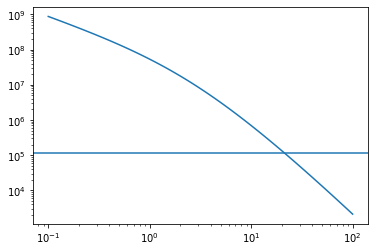

In [18]:
from pyHalo.Halos.lens_cosmo import LensCosmo
from scipy.optimize import minimize

def mean_enclosed_density_nfw(r_over_rs, rhos):
    return 3 * rhos / r_over_rs ** 3 * (np.log(1 + r_over_rs) - r_over_rs / (1 + r_over_rs))
   
def solve_tau(tau, rhos_sub, rho_enlocsed_host):
    
    rho_enclosed_sub = mean_enclosed_density_nfw(tau, rhos_sub)
    penalty = (rho_enclosed_sub - rho_enlocsed_host)**2/10**2
    return penalty
    
    
lc = LensCosmo()
msub = 10 ** 8
csub = 16.0
zsub = 0.5
x_pericenter = 0.08

x = np.logspace(-1, 2, 100) 
mhost = 10 ** 13.3
chost = 6.0
rhos_host, rs_host, _ = lc.NFW_params_physical(mhost, chost, zsub)

rhos_sub, rs_sub, _ = lc.NFW_params_physical(msub, csub, zsub)
rho_mean_sub = mean_enclosed_density_nfw(x * rs_sub, rhos_sub)

host_rho_mean = mean_enclosed_density_nfw(x_pericenter * rs_host, rhos_host)

plt.loglog(x, rho_mean_sub)
plt.axhline(3 * host_rho_mean)

opt = minimize(solve_tau, x0=10, args=(rhos_sub, host_rho_mean))
print(opt)